## Setup and Import

In [ ]:
import pandas as pd
import numpy as np
import mne
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
import random
from mne.viz import plot_topomap

In [21]:
# Import data from main notebook
%run NDS_Project.ipynb

100%|██████████| 468/468 [02:20<00:00,  3.33it/s]


Loaded 468 files
Total rows: 7667712
Creating RawArray with float64 data, n_channels=61, n_times=256
    Range : 0 ... 255 =      0.000 ...     0.996 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 32769 samples (128.004 s)



C:\Users\isabe\AppData\Local\Temp\ipykernel_19124\1850864053.py:30: RuntimeWarning: filter_length (32769) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  mne_data.filter(l_freq=1.0, h_freq=50.0, filter_length='128s')


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 1.000 (s)
Plotting power spectral density (dB=True).


c:\Users\isabe\Documents\CS 5723 _ NDS\NDS_Project\.venv\Lib\site-packages\mne\viz\utils.py:160: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
100%|██████████| 468/468 [00:21<00:00, 21.36it/s]

Adding metadata with 4 columns
468 matching events found


No baseline correction applied
0 projection items activated
CSV Files Found: 468
Epochs Loaded: 468
Number of files not loaded (missing data): 0
Shape of epochs: (468, 64, 256)
Metadata length matches epoch length: True
Number of Trials found:62
Number of Subjects found: 16
Conditions found: ['S1 obj' 'S2 nomatch,' 'S2 match']
Groups found: ['a' 'c']


100%|██████████| 480/480 [00:21<00:00, 22.64it/s]


Adding metadata with 4 columns
480 matching events found
No baseline correction applied
0 projection items activated
CSV Files Found: 480
Epochs Loaded: 480
Number of files not loaded (missing data): 0
Shape of epochs: (480, 64, 256)
Metadata length matches epoch length: True
Number of Trials found:66
Number of Subjects found: 16
Conditions found: ['S1 obj' 'S2 nomatch,' 'S2 match']
Groups found: ['a' 'c']
Adding metadata with 4 columns
948 matching events found
No baseline correction applied
(468, 64, 256)
(480, 64, 256)
(924, 64, 256)
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff 

C:\Users\isabe\AppData\Local\Temp\ipykernel_19124\119024203.py:106: RuntimeWarning: filter_length (845) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  epochs_merged.filter(l_freq=1.0, h_freq=50.0)


Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 845 samples (3.301 s)



C:\Users\isabe\AppData\Local\Temp\ipykernel_19124\119024203.py:107: RuntimeWarning: filter_length (845) is longer than the signal (256), distortion is likely. Reduce filter length or filter a longer signal.
  epochs.filter(l_freq=1.0, h_freq=50.0)
100%|██████████| 3/3 [00:01<00:00,  2.80it/s]

{'S1 obj': {'a': <EpochsArray | 160 events (all good), 0 – 0.996 s (baseline off), ~20.1 MiB, data loaded, with metadata,
 'S1 obj': 160>, 'c': <EpochsArray | 160 events (all good), 0 – 0.996 s (baseline off), ~20.1 MiB, data loaded, with metadata,
 'S1 obj': 160>}, 'S2 match': {'a': <EpochsArray | 153 events (all good), 0 – 0.996 s (baseline off), ~19.2 MiB, data loaded, with metadata,
 'S2 match': 153>, 'c': <EpochsArray | 150 events (all good), 0 – 0.996 s (baseline off), ~18.8 MiB, data loaded, with metadata,
 'S2 match': 150>}, 'S2 nomatch,': {'a': <EpochsArray | 155 events (all good), 0 – 0.996 s (baseline off), ~19.4 MiB, data loaded, with metadata,
 'S2 nomatch,': 155>, 'c': <EpochsArray | 146 events (all good), 0 – 0.996 s (baseline off), ~18.3 MiB, data loaded, with metadata,
 'S2 nomatch,': 146>}}
92
12
<EpochsArray | 7 events (all good), 0 – 0.996 s (baseline off), ~970 KiB, data loaded, with metadata,
 'S1 obj': 7>
<EpochsArray | 7 events (all good), 0 – 0.996 s (baseline 

# Reduce to regional analysis

### dict of Epoch Array to dict of avg time_series
(epoch, channel, time) -> (channel, time)

In [25]:
## Convert from dict of EpochArray to dict of evoked (Average of epoch array) converts from (event, channel, time) to (channel, time)
def convert_2D_grouping(epochs):
    averaged_data = {}
    for key, subdict in epochs.items():
        averaged_data[key] = {}
        for sub_key, arr in subdict.items():
            averaged_data[key][sub_key] = arr.average()
    return averaged_data
            
avg_cond_group = convert_2D_grouping(epochs_cond_group)

In [26]:
print(avg_cond_group)

{'S1 obj': {'a': <Evoked | 'S1 obj' (average, N=160), 0 – 0.99609 s, baseline off, 61 ch, ~194 KiB>, 'c': <Evoked | 'S1 obj' (average, N=160), 0 – 0.99609 s, baseline off, 61 ch, ~194 KiB>}, 'S2 match': {'a': <Evoked | 'S2 match' (average, N=153), 0 – 0.99609 s, baseline off, 61 ch, ~194 KiB>, 'c': <Evoked | 'S2 match' (average, N=150), 0 – 0.99609 s, baseline off, 61 ch, ~194 KiB>}, 'S2 nomatch,': {'a': <Evoked | 'S2 nomatch,' (average, N=155), 0 – 0.99609 s, baseline off, 61 ch, ~194 KiB>, 'c': <Evoked | 'S2 nomatch,' (average, N=146), 0 – 0.99609 s, baseline off, 61 ch, ~194 KiB>}}


### channels to brain regions
modified Will's code from df to mne object
(channel, time) -> (region, time)

In [27]:
regions = {
    'Fp': ['FP1', 'FP2', 'FPZ'],                             # Prefrontal
    'F': ['F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'FZ', 
          'AF1', 'AF2', 'AF7', 'AF8', 'AFZ'],                # Frontal
    'T': ['T7', 'T8', 'FT7', 'FT8', 'TP7', 'TP8'],           # Temporal
    'C': ['C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'CZ', 
          'FC1', 'FC2', 'FC3', 'FC4', 'FC5', 'FC6', 'FCZ',
          'CP1', 'CP2', 'CP3', 'CP4', 'CP5', 'CP6', 'CPZ'],  # Central
    'P': ['P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'PZ',
          'PO1', 'PO2', 'PO7', 'PO8', 'POZ'],                # Parietal
    'O': ['O1', 'O2', 'OZ']                                  # Occipital
}

def convert_chan_to_region(obj):
      ch_names = obj.ch_names
      sfreq = obj.info['sfreq']
      times = obj.times
      # Define region variable for obj data
      region_data = []
      region_names = []
      # loop over region 
      for name, channels in regions.items():
            # Select corresponding channels from obj
            chns = mne.pick_channels(ch_names, include=channels, ordered=False)
            # Catch if no channel exists
            if len(chns) == 0:
                  continue
            # Average the selected channels
            reg_ts = obj.data[chns].mean(axis=0)
            # Append name and time_series data to variables
            region_data.append(reg_ts)
            region_names.append(name)
      
      # Stack data (region, time)
      region_info = np.vstack(region_data)
      # Create new mne info for object for region
      info = mne.create_info(ch_names=region_names, sfreq=sfreq, ch_types='eeg')
      # Create evokedArray object of regions
      region_evoked = mne.EvokedArray(region_data, info, tmin=times[0])
      return region_evoked

def convert_2d_avg_to_region(avg_epochs):
      region_data = {}
      for key, subdict in avg_epochs.items():
            region_data[key] = {}
            for sub_key, arr in subdict.items():
                  region_data[key][sub_key] = convert_chan_to_region(arr)
                  print(region_data[key][sub_key].data.shape)      # (n_regions, n_times)
                  print(region_data[key][sub_key].ch_names)
      return region_data
                  
reg_cond_group = convert_2d_avg_to_region(avg_cond_group)

(6, 256)
['Fp', 'F', 'T', 'C', 'P', 'O']
(6, 256)
['Fp', 'F', 'T', 'C', 'P', 'O']
(6, 256)
['Fp', 'F', 'T', 'C', 'P', 'O']
(6, 256)
['Fp', 'F', 'T', 'C', 'P', 'O']
(6, 256)
['Fp', 'F', 'T', 'C', 'P', 'O']
(6, 256)
['Fp', 'F', 'T', 'C', 'P', 'O']


## Plot Topomaps

Topomap of Averaged S1 obj - a Trials


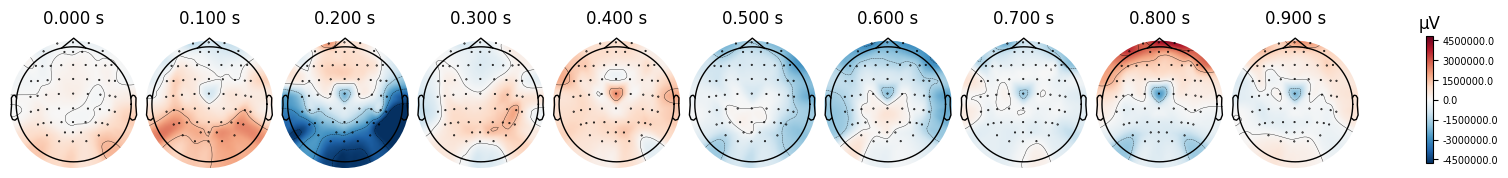

Topomap of Averaged S1 obj - c Trials


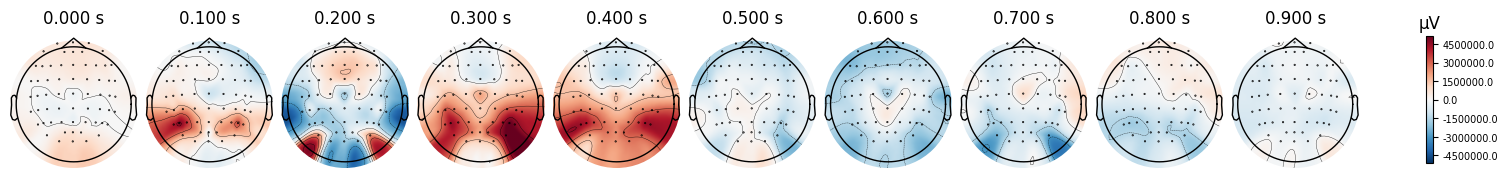

Topomap of Averaged S2 match - a Trials


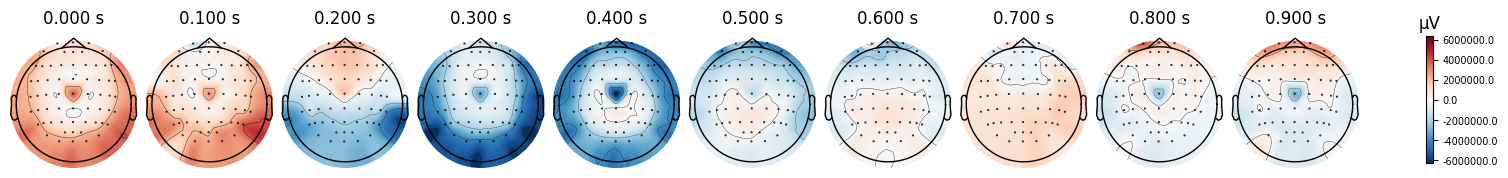

Topomap of Averaged S2 match - c Trials


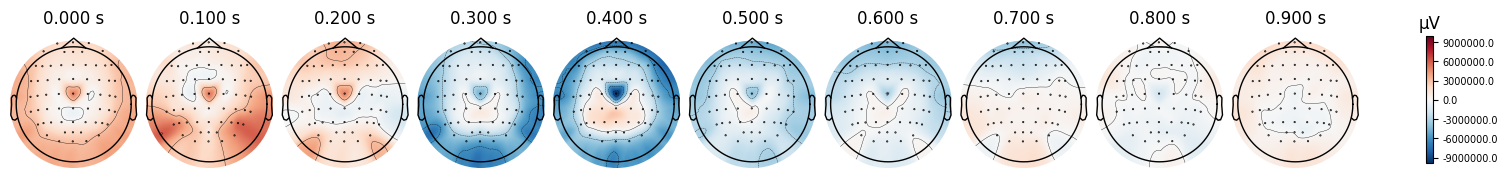

Topomap of Averaged S2 nomatch, - a Trials


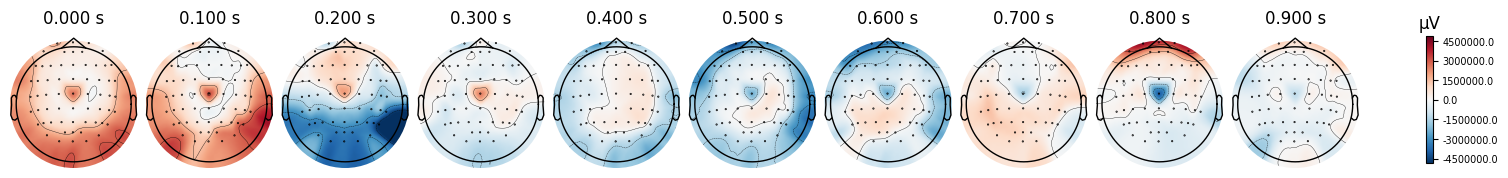

Topomap of Averaged S2 nomatch, - c Trials


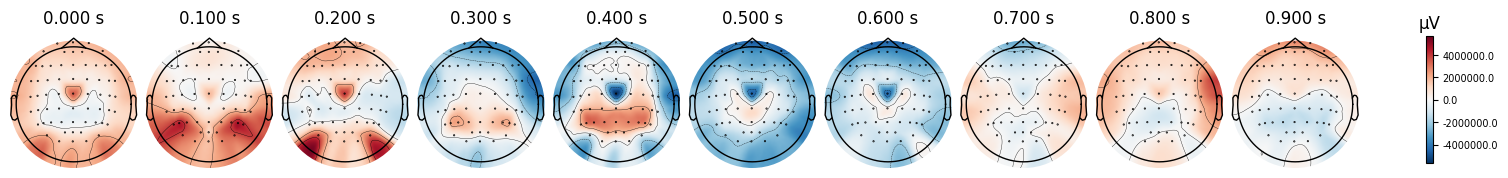

In [ ]:
times = np.arange(0,1,0.1)
for key, subdict in avg_cond_group.items():
    for sub_key, arr in subdict.items():
        print(f"Topomap of Averaged {key} - {sub_key} Trials")
        arr.plot_topomap(times,ch_type='eeg')

In [ ]:
times = np.arange(0,1,0.1)
for key, subdict in avg_cond_group.items():
    for sub_key, arr in subdict.items():
        print(f"Topomap of Averaged {key} - {sub_key} Trials")
        arr.plot_topomap(times,ch_type='eeg')